<a href="https://colab.research.google.com/github/HeberBernal/Heber-base-de-datos-challenge1-latam/blob/main/AluraStoreLatamHeber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



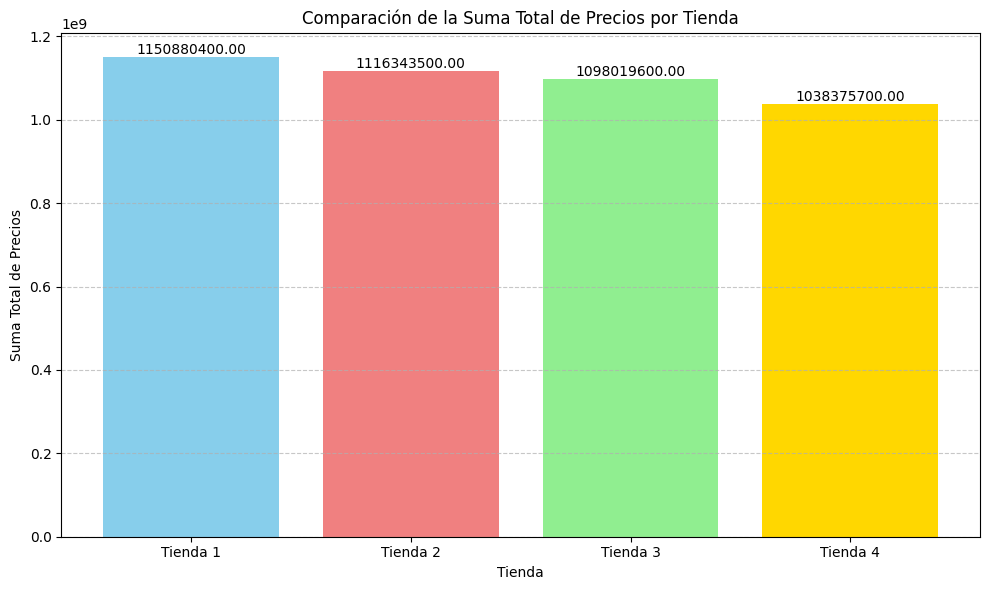

In [ ]:
# Nombre de la columna de precios (¡con 'P' mayúscula!)
NOMBRE_COLUMNA_PRECIO = 'Precio'

# Calcular el total de precios para cada tienda
tienda[NOMBRE_COLUMNA_PRECIO] = pd.to_numeric(tienda[NOMBRE_COLUMNA_PRECIO], errors='coerce')
total_tienda1 = tienda[NOMBRE_COLUMNA_PRECIO].sum()

tienda2[NOMBRE_COLUMNA_PRECIO] = pd.to_numeric(tienda2[NOMBRE_COLUMNA_PRECIO], errors='coerce')
total_tienda2 = tienda2[NOMBRE_COLUMNA_PRECIO].sum()

tienda3[NOMBRE_COLUMNA_PRECIO] = pd.to_numeric(tienda3[NOMBRE_COLUMNA_PRECIO], errors='coerce')
total_tienda3 = tienda3[NOMBRE_COLUMNA_PRECIO].sum()

tienda4[NOMBRE_COLUMNA_PRECIO] = pd.to_numeric(tienda4[NOMBRE_COLUMNA_PRECIO], errors='coerce')
total_tienda4 = tienda4[NOMBRE_COLUMNA_PRECIO].sum()

# Preparar los datos para el gráfico
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
totales_precios = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico
plt.bar(nombres_tiendas, totales_precios, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Añadir títulos y etiquetas
plt.xlabel("Tienda")
plt.ylabel("Suma Total de Precios")
plt.title("Comparación de la Suma Total de Precios por Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula en el eje Y

# Mostrar el valor sobre cada barra
for i, total in enumerate(totales_precios):
    plt.text(i, total + 1000, f'{total:.2f}', ha='center', va='bottom') # Ajusta el +1000 según la escala de tus precios

# Mostrar el gráfico
plt.tight_layout() # Ajusta el diseño para que no se corten las etiquetas
plt.show()







# 2. Ventas por categoría

In [ ]:
# Las variables 'tienda', 'tienda2', 'tienda3', y 'tienda4'

conteo_t1 = tienda.groupby("Categoría del Producto").size().rename("Tienda 1")
conteo_t2 = tienda2.groupby("Categoría del Producto").size().rename("Tienda 2")
conteo_t3 = tienda3.groupby("Categoría del Producto").size().rename("Tienda 3")
conteo_t4 = tienda4.groupby("Categoría del Producto").size().rename("Tienda 4")

# Unificar todo en una tabla
conteo_total = pd.concat([conteo_t1, conteo_t2, conteo_t3, conteo_t4], axis=1).fillna(0).astype(int)

#categoría más popular por tienda (mayor cantidad)
categorias_populares = conteo_total.idxmax()
valores_maximos = conteo_total.max()

categorias_mas_populares = conteo_total.idxmax()

print("Categorías más populares por tienda:")
print(categorias_mas_populares)

print("\n---")

print("Conteo total de productos por categoría y tienda:")
print(conteo_total)

Categorías más populares por tienda:
Tienda 1    Muebles
Tienda 2    Muebles
Tienda 3    Muebles
Tienda 4    Muebles
dtype: object

---
Conteo total de productos por categoría y tienda:
                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


#3. Calificación promedio de la tienda

In [ ]:
# Cargar los datos de cada tienda
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Asignar un identificador de tienda a cada DataFrame
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames en uno solo
todas_las_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Agrupar por la columna 'Tienda', calcular el promedio de 'Calificación' y redondear a 2 decimales
calificacion_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Calificación'].mean().round(2)

# Mostrar el resultado
print(calificacion_promedio_por_tienda)

Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


<Axes: title={'center': 'Calificación promedio de los clientes por tienda'}, xlabel='Tienda'>

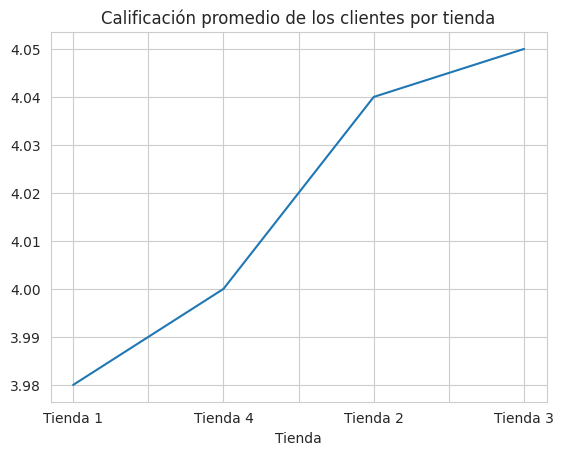

In [ ]:
# Calificaciones promedio por tienda
calif_t1 = tienda["Calificación"].mean()
calif_t2 = tienda2["Calificación"].mean()
calif_t3 = tienda3["Calificación"].mean()
calif_t4 = tienda4["Calificación"].mean()

# Agrupamos en un dataframe para una mejor visualización
calificaciones_promedio = pd.DataFrame({
    "Tienda 1": [calif_t1],
    "Tienda 2": [calif_t2],
    "Tienda 3": [calif_t3],
    "Tienda 4": [calif_t4]
}).round(2)  # Redondeamos a 2 decimales

calificaciones_promedio.index = ['Calificación promedio']

# Difenciamos los gráficos pandas
calificaciones_promedio = calificaciones_promedio.transpose()

# Reseteamos el index
calificaciones_promedio = calificaciones_promedio.reset_index()

# Renombramos las columnas
calificaciones_promedio.columns = ['Tienda', 'Calificación promedio']

# Ordenamos por calificaciones promedio
calificaciones_promedio = calificaciones_promedio.sort_values(by='Calificación promedio', ascending=True)
calificaciones_promedio.plot(kind='line', x='Tienda', y='Calificación promedio', title='Calificación promedio de los clientes por tienda', legend=False)



# 4. Productos más y menos vendidos

/tmp/ipython-input-42-3535022989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette="viridis", ax=axes[0])
/tmp/ipython-input-42-3535022989.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, palette="magma", ax=axes[1])


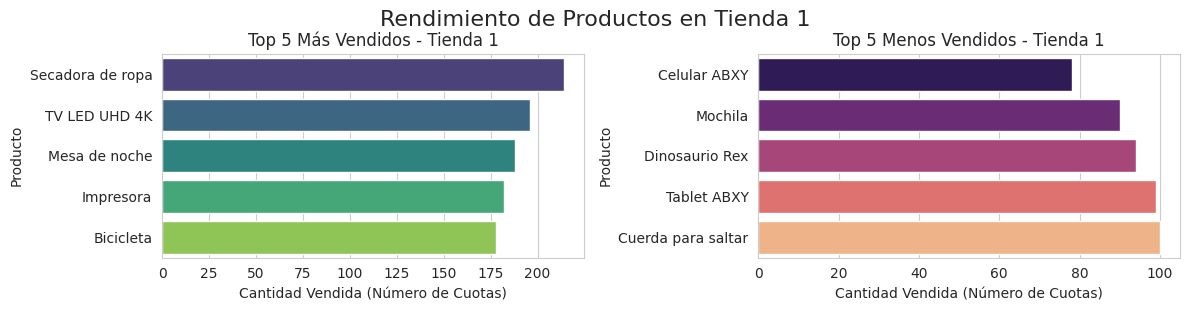

/tmp/ipython-input-42-3535022989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette="viridis", ax=axes[0])
/tmp/ipython-input-42-3535022989.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, palette="magma", ax=axes[1])


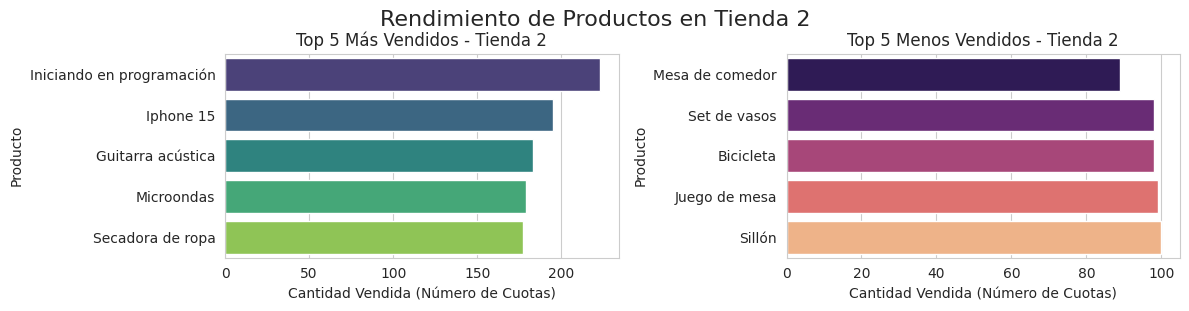

/tmp/ipython-input-42-3535022989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette="viridis", ax=axes[0])
/tmp/ipython-input-42-3535022989.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, palette="magma", ax=axes[1])


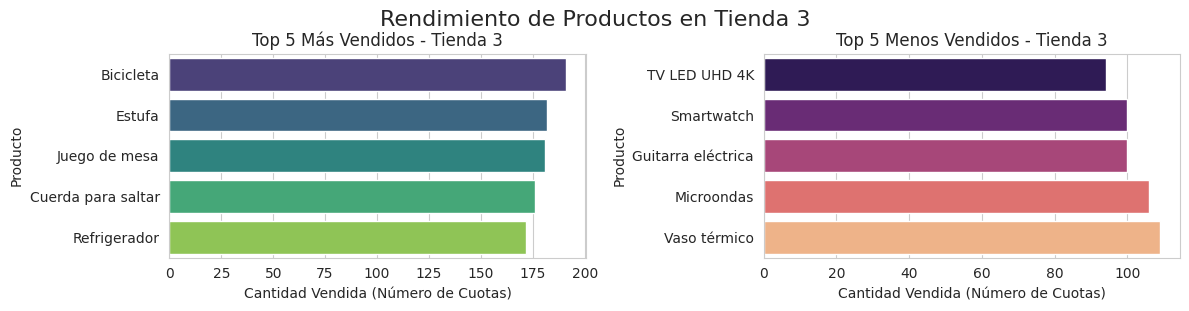

/tmp/ipython-input-42-3535022989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette="viridis", ax=axes[0])
/tmp/ipython-input-42-3535022989.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, palette="magma", ax=axes[1])


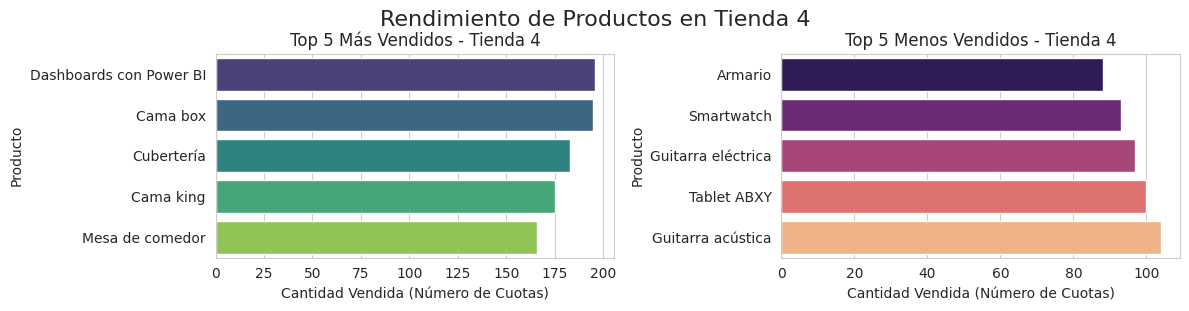

In [ ]:
# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Función para obtener y graficar el top 5 de más y menos vendidos en una sola figura compacta
def plot_top_and_bottom_products_compact(df, store_name):
    # Renombrar columnas
    df_renamed = df.rename(columns={'Producto': 'producto', 'Cantidad de cuotas': 'cantidad'})

    # Asegurarse de que la columna 'cantidad' sea numérica
    df_renamed['cantidad'] = pd.to_numeric(df_renamed['cantidad'], errors='coerce')
    df_renamed.dropna(subset=['cantidad'], inplace=True)

    # Calcular la cantidad total vendida por producto
    ventas_por_producto = df_renamed.groupby('producto')['cantidad'].sum().sort_values(ascending=False)

    # Crear una figura con dos subgráficos (1 fila, 2 columnas)
    # AJUSTE: Aumentamos un poco el ancho y la altura para el gráfico y barras
    fig, axes = plt.subplots(1, 2, figsize=(12, 3)) # Ancho de 10 a 12, Altura de 2 a 3

    # --- Subgráfico 1: Top 5 Más Vendidos ---
    top_5 = ventas_por_producto.head(5)
    if not top_5.empty:
        sns.barplot(x=top_5.values, y=top_5.index, palette="viridis", ax=axes[0])
        axes[0].set_title(f'Top 5 Más Vendidos - {store_name}')
        axes[0].set_xlabel('Cantidad Vendida (Número de Cuotas)')
        axes[0].set_ylabel('Producto')
    else:
        axes[0].set_title(f'Top 5 Más Vendidos - {store_name} (Sin datos)')
        axes[0].text(0.5, 0.5, 'No hay datos suficientes', horizontalalignment='center',
                     verticalalignment='center', transform=axes[0].transAxes)

    # --- Subgráfico 2: Top 5 Menos Vendidos ---
    bottom_5 = ventas_por_producto.tail(5).sort_values(ascending=True) # Ordenar de menor a mayor para el gráfico
    if not bottom_5.empty:
        sns.barplot(x=bottom_5.values, y=bottom_5.index, palette="magma", ax=axes[1])
        axes[1].set_title(f'Top 5 Menos Vendidos - {store_name}')
        axes[1].set_xlabel('Cantidad Vendida (Número de Cuotas)')
        axes[1].set_ylabel('Producto')
    else:
        axes[1].set_title(f'Top 5 Menos Vendidos - {store_name} (Sin datos)')
        axes[1].text(0.5, 0.5, 'No hay datos suficientes', horizontalalignment='center',
                     verticalalignment='center', transform=axes[1].transAxes)

    plt.tight_layout()
    plt.suptitle(f'Rendimiento de Productos en {store_name}', y=1.02, fontsize=16)
    plt.show()

# Procesar y graficar cada tienda de forma compacta
plot_top_and_bottom_products_compact(tienda.copy(), "Tienda 1")
plot_top_and_bottom_products_compact(tienda2.copy(), "Tienda 2")
plot_top_and_bottom_products_compact(tienda3.copy(), "Tienda 3")
plot_top_and_bottom_products_compact(tienda4.copy(), "Tienda 4")

# 5. Envío promedio por tienda

In [ ]:
# Función para calcular el costo de envío promedio
def calculate_average_shipping_cost(df, store_name):
    # Asegurarse de que la columna 'Costo de envío' sea numérica
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    # Eliminar filas con valores NaN en 'Costo de envío' si los hubiera
    df.dropna(subset=['Costo de envío'], inplace=True)

    if not df.empty:
        average_cost = df['Costo de envío'].mean()
        print(f"El costo de envío promedio para la {store_name} es: ${average_cost:,.2f}")
    else:
        print(f"No hay datos válidos de costo de envío para la {store_name}.")

print("--- Costo de Envío Promedio por Tienda ---")
calculate_average_shipping_cost(tienda.copy(), "Tienda 1")
calculate_average_shipping_cost(tienda2.copy(), "Tienda 2")
calculate_average_shipping_cost(tienda3.copy(), "Tienda 3")
calculate_average_shipping_cost(tienda4.copy(), "Tienda 4")


--- Costo de Envío Promedio por Tienda ---
El costo de envío promedio para la Tienda 1 es: $26,018.61
El costo de envío promedio para la Tienda 2 es: $25,216.24
El costo de envío promedio para la Tienda 3 es: $24,805.68
El costo de envío promedio para la Tienda 4 es: $23,459.46


/tmp/ipython-input-13051291.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=df_promedios_envio, palette='Paired')


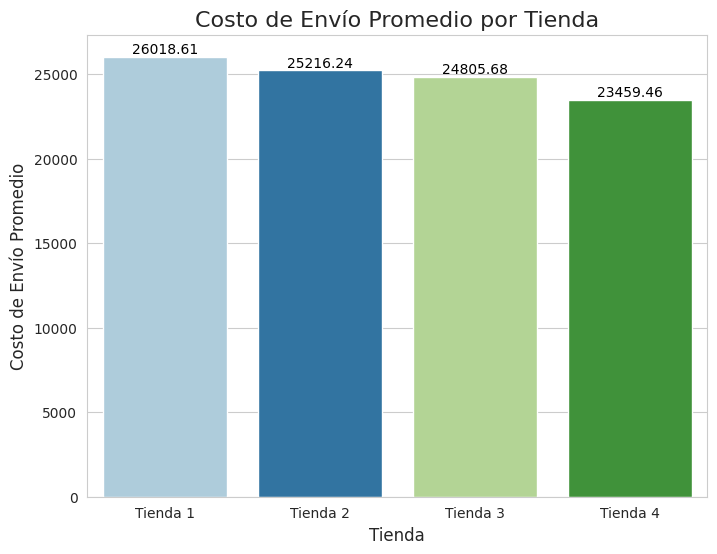

In [ ]:
# Función para cargar los datos de manera segura desde una URL
def load_data_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        raise Exception(f"Error al cargar los datos desde la URL: {url}. Código de estado: {response.status_code}")

try:
    # Cargar los datos y calcular el promedio del costo de envío de cada tienda
    promedio_envio1 = load_data_from_url(url1)['Costo de envío'].mean()
    promedio_envio2 = load_data_from_url(url2)['Costo de envío'].mean()
    promedio_envio3 = load_data_from_url(url3)['Costo de envío'].mean()
    promedio_envio4 = load_data_from_url(url4)['Costo de envío'].mean()

    # Crear un DataFrame con los promedios
    datos = {
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Costo de Envío Promedio': [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]
    }
    df_promedios_envio = pd.DataFrame(datos)

    # Configurar el estilo de los gráficos con Seaborn
    sns.set_style("whitegrid")

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 6))
    barplot = sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=df_promedios_envio, palette='Paired')

    # Añadir un título y etiquetas a los ejes
    plt.title('Costo de Envío Promedio por Tienda', fontsize=16)
    plt.xlabel('Tienda', fontsize=12)
    plt.ylabel('Costo de Envío Promedio', fontsize=12)

    # Añadir las etiquetas de valor en la parte superior de cada barra
    for index, row in df_promedios_envio.iterrows():
        barplot.text(index, row['Costo de Envío Promedio'] + 200, round(row['Costo de Envío Promedio'], 2),
                     color='black', ha="center")

    # Mostrar el gráfico
    plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")